In [24]:
import numpy as np
import pandas as pd
season = pd.read_csv("all_seasons.csv")
season

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [25]:
fitur_loc = ['age','player_height', 'player_weight','college']
fitur = ['age','player_height', 'player_weight']
X = season[fitur]
y = season.college
X

,age,player_height,player_weight
0,36.0,198.12,99.790240
1,28.0,215.90,117.933920
2,39.0,205.74,95.254320
3,24.0,203.20,100.697424
4,34.0,205.74,108.862080
...,...,...,...
12300,32.0,205.74,111.130040
12301,24.0,193.04,94.800728
12302,28.0,193.04,99.790240
12303,23.0,195.58,92.986360


In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 2.05629981 -0.27242682 -0.04646171]
 [ 0.21115006  1.67160329  1.40775001]
 [ 2.74823097  0.56072894 -0.41001464]
 [-0.71142482  0.28301035  0.02624887]
 [ 1.59501238  0.56072894  0.68064415]]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-1.17271225 -0.55014541 -0.26459347]
 [-0.4807811   0.00529176  1.22597354]
 [-0.4807811   0.83844753  0.13531475]
 [-0.4807811  -1.38330117 -0.48272523]
 [ 0.90308122  0.83844753  0.49886768]]
y Training: 8273          Missouri
1666            Drexel
8018    North Carolina
313      Arizona State
444               Iowa
Name: college, dtype: object


In [28]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [29]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['None' 'None' 'None' ... 'None' 'None' 'None']


Akurasi : 15.195016251354279 %


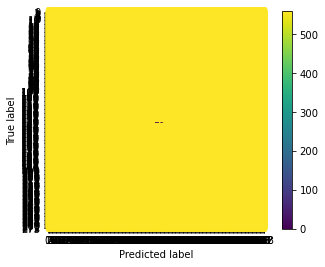

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))